# see19

**An aggregation dataset and interface for visualizing 
           and analyzing Coronavirus Disease 2019 aka COVID19 
           aka C19**

*Dataset Last Updated June 19, 2020 20:50:08*
       

***
# June 19, 2020 Update 

**New Testset**: Hospitalization data has been added for select states in the US and Italy. Data pulled from same sources as cases, fatality, and testing data. The testset will be updated periodically until data is merged 

***
# June 17, 2020 Update 

All US state-level data is now being compiled via [covidtracking.com](https://covidtracking.com/). Docs to be updated in due course.

***
# May 31, 2020 Update 

Upgrade to version 0.3 is complete. Please exercise **caution** if switching to this version as there have been a number of significant changes / additions that might impact your prior work.

**SUMMARY OF UPDATES**

**1. Testset Graduation**
* ***Test counts*** and ***Apple mobility*** data have been moved into the main dataset.
    * Reporting on testing continues to be inconsistent around the world. Many countries have only just begun reporting and many report on an infrequent basis (weekly or worse). Where there are gaps in daily figures, non-linear interpolation is used to smooth figures. Several key regions including Brazil and France have very minimal data at all.

**2. Added filter functionality**   
When instanting a `CaseStudy` instance:
* You can now pass any of `region_id`, `region_code`, or `region_name` to `regions`/`exclude_regions` in a single iterable. `region_code` column has been added, and is either simply a replica of `country_code` or the accepted abbreviation of the province or state. i.e. *Alberta's* `region_code` is **AB**.
* `country_code` and `country_id` now also acceptable in `countries`/`exclude_countries`
* pandas Series and numpy arrays are now acceptable iterables for these filters as well.

**3. Miscellaneous**    
* To access the testset via `get_baseframe`, set `test=True`
* Added progress bar for `get_baseframe()` (a couple hours I won't ever get back)
* Additional styling attributes to most chart make() functions
* Added exception to catch when a `country_w_sub` is provided as region when `country_level=False`
* when `USA` is filter via `countries`, see19 now automatically excludes the country of Georgia. This was a major personal irritant of mine, but if you have the need you can simply include Georgia in `countries` as well.


***
# Latest Analysis
[How Effective Is Social Distancing?](https://ryanskene.github.io/see19/analysis/How%20Effective%20Is%20Social%20Distancing%3F.html)

[What Factors Are Correlated With COVID19 Fatality Rates?](https://ryanskene.github.io/see19/analysis/What%20Factors%20Are%20Correlated%20With%20COVID19%20Fatality%20Rates%3F.html)

[The COVID Dragons](https://ryanskene.github.io/see19/analysis/The%20COVID%20Dragons.html)

***
# The Dataset
The dataset is in `csv` format and can be found [here](https://github.com/ryanskene/see19/tree/master/dataset)

You can find relevant statistics and detailed sourcing in the **[Guide](https://ryanskene.github.io/see19/)**

# The Package

the `see19` package is available on [pypi](https://pypi.org/project/see19/) and can be installed as follows:

`pip install see19`

The package provides a helpful `pandas`-based interface for working with the dataset. It also provides several visualization tools 

# The Guide
The **[Guide](https://ryanskene.github.io/see19/)** details data sources, structure, functionality, and visualization tools.

***
# Purpose

##### _"It is better to be vaguely right than exactly wrong."_   

_- Carveth Read, Logic, Chapter 22_

<br/>

**see19** is an early stage attempt to aggregate various data sources and analyze their impact (together and in isolation) on the virulence of SARS-CoV2.

* Ease-of-use is paramount, thus, all data from all sources have been compiled into a single structure, readily consumed and manipulated in the ubiquitous `csv` format.

**see19** aggregates the following data:

* COVID19 Data Characteristics:
    * Cumulative Case, Fatality, and Testing statistics for each region on each date
    * State / Provincial-level data available for
* Factor Data Characteristics available for most regions include:
    * Longitude / Latitude, Population, Demographic Segmentation, Density
    * Climate Characteristics including temperatue and uvb radiation
    * Historical Health Outcomes
    * Travel Popularity
    * Social Distancing Implementation
    * And more and counting ...

There is no single all-encompassing data from an undoubted source that will serve the needs of every user for every use case. Thus, the dataset as it stands is an ad-hoc aggregation from multiple sources with *eyeball*-style approximations used in some instances. But while the dataset's imperfections are numerous, they cannot blunt the power of the insights that can be gleaned from an early exploratory analysis.

In addition to the dataset, `see19` is a python package that provides:
* Helpful `pandas`-based interface for manipulating the data
* Visualization tools in `bokeh` and `matplotlib` to compare factors across multiple dimensions ..
* Statistical analysis is also a goal of the project and I expect to add such analysis tools as time progresses. Until then, the data is available for all.

***
# Suggestions For Additional Data

I am always on the hunt for new additions to the dataset. If you have any suggestions, please contact me. Specifically, if you are aware of any datasets that might integrate nicely with `see19` in the following realms:

1. German daily, state-level counts
2. Russian daily, state-level counts
3. India daily, sate-level counts
3. State or city level travel data
4. Global Commercial Airline route data (there seems to be plenty available, except only for a whopping price)

***
# Quick Demo

You can very quickly use see19 to develop visuals for COVID19 analysis and presentation.

The `see19` package can be installed via `pip`.

`pip install see19`

Then simply:

In [6]:
# Required to use Bokeh with Jupyter notebooks
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [7]:
from see19 import get_baseframe, CaseStudy
baseframe = get_baseframe()

In [8]:
regions = ['Germany', 'Spain']
casestudy = CaseStudy(baseframe, regions=regions, count_categories='deaths_new_dma_per_1M')

label_offsets = {'Germany': {'x_offset': 8, 'y_offset': 8}, 'Spain': {'x_offset': 5, 'y_offset': 5}}  
p = casestudy.comp_chart.make(comp_type='multiline', label_offsets=label_offsets, width=750)

show(p)

![Bokeh](README_files/bokeh.png)

In [9]:
%matplotlib inline

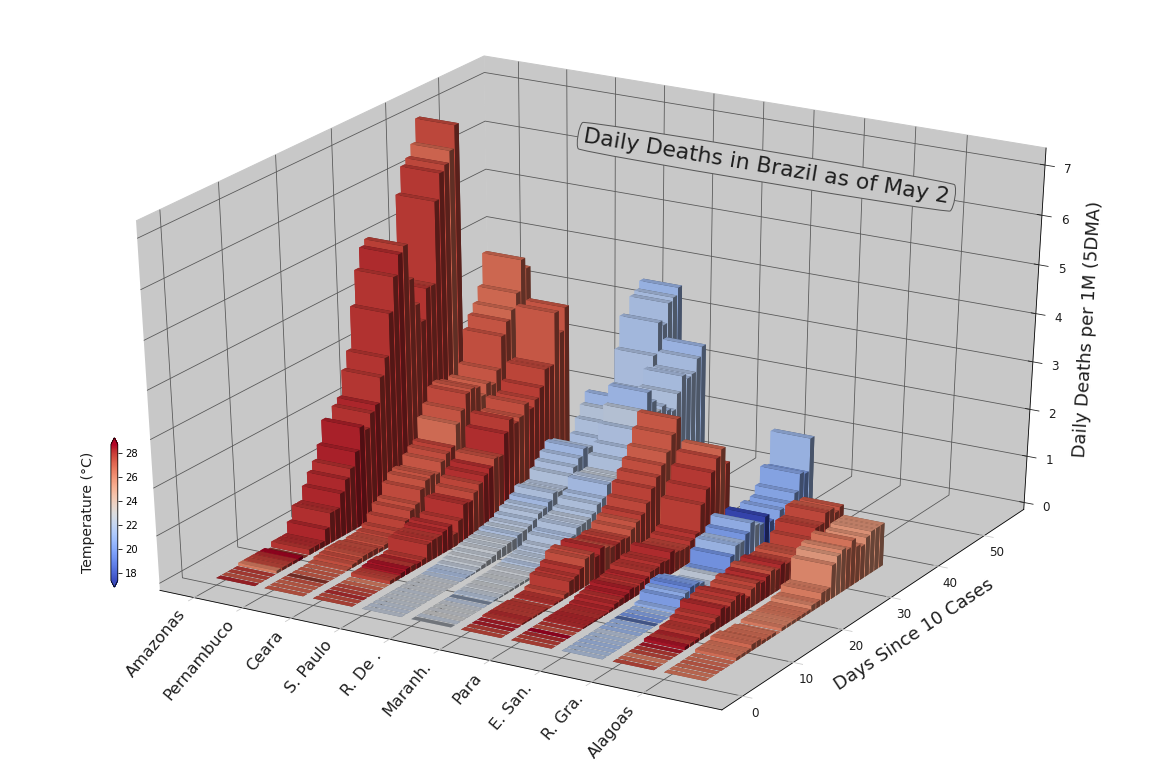

In [10]:
regions = list(baseframe[baseframe['country'] == 'Brazil'] \
    .sort_values(by='population', ascending=False) \
    .region_name.unique())[:20]

casestudy = CaseStudy(
    baseframe, count_dma=5, 
    factors=['temp'],
    regions=regions, start_hurdle=10, start_factor='cases', lognat=True,
)
kwargs = {
    'color_factor': 'temp',
    'fs_xticks': 16, 'fs_yticks': 12, 'fs_zticks': 12,
    'fs_xlabel': 12, 'fs_ylabel': 18, 'fs_zlabel': 18,
    'title': 'Daily Deaths in Brazil as of May 2',
    'x_title': 0.499, 'y_title': 0.738, 'fs_title': 22, 'rot_title': -9.5,
    'x_colorbar': 0.09, 'y_colorbar': .225, 'h_colorbar': 20, 'w_colorbar': .01, 
    'a_colorbar': 'vertical', 'cb_labelpad': -57,
    'tight': True, 'abbreviate': 'first', 'comp_size': 10,
}
p = casestudy.comp_chart4d.make(comp_category='deaths_new_dma_per_1M', **kwargs)